In [22]:
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.interpolate import griddata
import xarray as xr
from metpy.units import units


from util import spectra_analysis as spectra
from util import calc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2
file = "/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscreamv0_RCE_SMALL.lp05.P3_hom_t_atm_iulog_debug/run/dpscreamv0_RCE_SMALL.lp05.P3_hom_t_atm_iulog_debug.eam.h0.2000-01-01-00000.nc"

# ds = spectra.open_w_dataarray(file)
# ds

In [3]:
x = 110 * units.m
x.to('m').u


<Unit('meter')>

In [4]:
ds = xr.open_dataset(file)[['crm_grid_x','crm_grid_y']]
unstruc_lat = ds['crm_grid_y'].metpy.quantify()
unstruc_lon = ds['crm_grid_x'].metpy.quantify()
unstruc_lat.metpy.unit_array.u

<Unit('meter')>

In [14]:
%autoreload 2
w_regridded = spectra.regrid_w(file, lev=(250*units.hPa),
                               lat_var='crm_grid_y', lon_var='crm_grid_x')
w_regridded

units in km
The distance in the x direction, crm_grid_x, is 117.2360703125 kilometer with grid spacing of 3.33 kilometer.
The distance in the y direction, crm_grid_y, is 117.2360703125 kilometer with grid spacing of 3.33 kilometer.


<xarray.DataArray (time: 41, lon: 36, lat: 36)> Size: 425kB
array([[[-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        ...,
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ]],

       [[ 0.00420884,  0.00270432,  0.00027936, ...,  0.00599123,
          0.00575757,  0.00500803],
        [ 0.0052121 ,  0.00394406,  0.00170448, ...,  0.0061505 ,
          0.00620055,  0.00579597],
        [ 0.00594461,  0.00518432,  0.0037979 , ...,  0.00580517,
          0.00609715,  0.00612046],
...
        [ 0.04701009,  0.04889283,  0.05447999, ...,  0.04632016,
          0.04598245,  0.04610311],
        [ 0.06292668,  0.06047946,  0.05978133, ...,  0.06036798,
          0.06273598,  0.06373917],
        [ 0.08556607,  0.07755699,  0.06783571, ...,  0.07942268,
          0.08522114,  0.08785043]],

       [[-0.0586468 , -0.08809392, -0.14543988, ..., -0.01601043,
         -0.01654656, -0.02804303],
        [-0.06075052, -0.08480433, -0.13626764, ..., -0.02223093,
         -0.02380448, -0.03651115],
        [-0.05447369, -0.06307809, -0.09533543, ..., -0.04553573,
         -0.0431855 , -0.04390196],
        ...,
        [-0.02970041, -0.05821899, -0.1137766 , ...,  0.02494862,
          0.01982879,  0.0092697 ],
        [-0.04096857, -0.07188806, -0.13039118, ...,  0.00763265,
          0.00683252, -0.00068175],
        [-0.05144181, -0.08697836, -0.1503503 , ..., -0.00134729,
         -0.00113539, -0.01557436]]])
Coordinates:
  * time     (time) object 328B 2000-01-01 00:00:00 ... 2000-01-11 00:00:00
  * lon      (lon) float64 288B 0.0 3.35e+03 6.699e+03 ... 1.139e+05 1.172e+05
  * lat      (lat) float64 288B 0.0 3.35e+03 6.699e+03 ... 1.139e+05 1.172e+05
Attributes:
    long_name:  vertical velocity regridded to near native regulat lat-lon grid
    name:       W
    units:      m/s

In [20]:
%autoreload 2
freq_xy, w_psd_xy = spectra.calc_psd_welch(w_regridded, fs=3.3)

w_psd_xy

0
1
2
3
4
5
6
7
8
9
10
11
12
13


<string>:37: UserWarning: nperseg=72 is greater than signal length max(len(x), len(y)) = 36, using nperseg = 36


14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


array([[[1.03909451e-05, 9.23588961e-06, 1.08541255e-05, ...,
         8.21208170e-09, 3.09610838e-09, 2.03032390e-09],
        [8.04849551e-06, 1.10312305e-05, 5.00100212e-06, ...,
         2.74200749e-09, 2.07329309e-09, 2.10020821e-09],
        [3.64256322e-06, 1.45232361e-05, 2.44410669e-06, ...,
         2.02631872e-08, 7.48181701e-10, 3.48605398e-11],
        ...,
        [1.42318291e-05, 2.92384975e-05, 1.80858083e-05, ...,
         3.18568159e-08, 1.73846056e-08, 3.88715087e-09],
        [9.04156369e-06, 2.55923788e-05, 2.42858954e-05, ...,
         2.97348201e-08, 1.35428956e-08, 2.08165796e-09],
        [1.08865010e-06, 1.64044374e-05, 2.15807884e-05, ...,
         7.85450380e-09, 6.55006817e-09, 1.47367389e-09]],

       [[3.40169475e-04, 3.77990643e-02, 3.40876032e-02, ...,
         4.27086338e-07, 9.54046730e-06, 1.26337124e-05],
        [3.15781667e-05, 2.20919351e-02, 8.56079654e-02, ...,
         1.05428528e-05, 1.72790733e-05, 3.30208167e-05],
        [3.70771785e-04, 

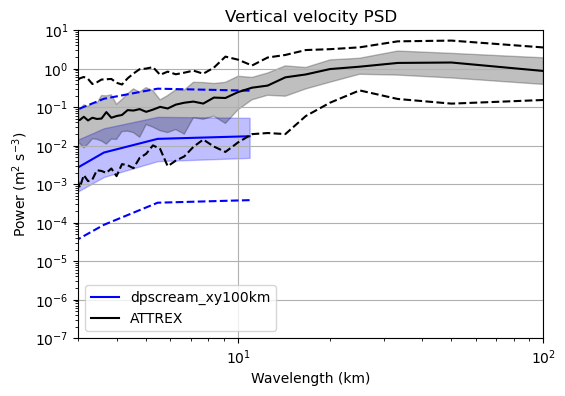

In [30]:
%autoreload 2
fig, ax = plt.subplots(1,1, figsize=(6,4))
spectra.plot_model_w_psd(freq_xy, w_psd_xy, ax=ax, label="dpscream_xy100km")
spectra.plot_attrex_w_pwd(ax=ax)
ax.legend()
ax.grid()
ax.set(title="Vertical velocity PSD")
plt.show()